In [5]:
import sys, os

from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hyppo.tools import power

In [9]:
sys.path.append(os.path.realpath('..'))
sns.set(color_codes=True, style='white', context='talk', font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

MAX_SAMPLE_SIZE = 100
STEP_SIZE = 5
SAMP_SIZES = range(5, MAX_SAMPLE_SIZE + STEP_SIZE, STEP_SIZE)
POWER_REPS = 5

SIMULATIONS = {
    "linear": "Linear",
    "exponential": "Exponential",
    "cubic": "Cubic",
    "joint_normal": "Joint Normal",
    "step": "Step",
    "quadratic": "Quadratic",
    "w_shaped": "W-Shaped",
    "spiral": "Spiral",
    "uncorrelated_bernoulli": "Bernoulli",
    "logarithmic": "Logarithmic",
    "fourth_root": "Fourth Root",
    "sin_four_pi": "Sine 4\u03C0",
    "sin_sixteen_pi": "Sine 16\u03C0",
    "square": "Square",
    "two_parabolas": "Two Parabolas",
    "circle": "Circle",
    "ellipse": "Ellipse",
    "diamond": "Diamond",
    "multiplicative_noise": "Multiplicative",
    "multimodal_independence": "Independence"
}
TESTS = [
    ["MaxMargin", "Dcorr"],
#     "KMERF",
#     "MGC",
    "Dcorr",
#     "Hsic",
#     "HHG",
#     "CCA",
#     "RV",
]

In [7]:
def estimate_power(sim, test):
    est_power = np.array(
        [
            np.mean(
                [
                    power(test, sim_type="indep", sim=sim, n=i, p=3, auto=True)
                    for _ in range(POWER_REPS)
                ]
            )
            for i in SAMP_SIZES
        ]
    )
    test = test[0] if type(test) is list else test
    np.savetxt(
        "../max_margin/vs_samplesize/{}_{}.csv".format(sim, test),
        est_power,
        delimiter=",",
    )

    return est_power

In [8]:
outputs = Parallel(n_jobs=-1, verbose=100)(
    [delayed(estimate_power)(sim, test) for sim in SIMULATIONS.keys() for test in TESTS]
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed: 15.5min remaining: 139.1min
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed: 15.5min remaining: 87.6min
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed: 15.5min remaining: 61.9min
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed: 15.5min remaining: 46.5min
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed: 15.5min remaining: 36.1min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed: 15.5min remaining: 28.8min
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed: 15.5min remaining: 23.3min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed: 15.5min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 15.7min remaining: 15.7min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed: 15.7min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elaps

In [10]:
def plot_power():
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
    plt.suptitle(
        "Multivariate Independence Testing (Increasing Sample Size)",
        y=0.93,
        va="baseline",
    )

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 5 * i + j
            sim = list(SIMULATIONS.keys())[count]

            for test in TESTS:
                test = test[0] if type(test) is list else test
                power = np.genfromtxt(
                    "../max_margin/vs_samplesize/{}_{}.csv".format(sim, test),
                    delimiter=",",
                )
                
                kwargs = {
                    "label": test,
                    "lw": 2,
                }
                if test in ["MaxMargin"]:
                    kwargs["color"] = "#e41a1c"
                    kwargs["lw"] = 4

                col.plot(SAMP_SIZES, power, **kwargs)
                col.set_xticks([])
                if i == 3:
                    col.set_xticks([SAMP_SIZES[0], SAMP_SIZES[-1]])
                col.set_ylim(-0.05, 1.05)
                col.set_yticks([])
                if j == 0:
                    col.set_yticks([0, 1])
                col.set_title(SIMULATIONS[sim])

    fig.text(0.5, 0.07, "Sample Size", ha="center")
    fig.text(
        0.07,
        0.5,
        "Absolute Power",
        va="center",
        rotation="vertical",
    )
    leg = plt.legend(
        bbox_to_anchor=(0.5, 0.07),
        bbox_transform=plt.gcf().transFigure,
        ncol=len(TESTS),
        loc="upper center",
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=0.50)
    plt.savefig(
        "../max_margin/figs/indep_power_sampsize.pdf", transparent=True, bbox_inches="tight"
    )

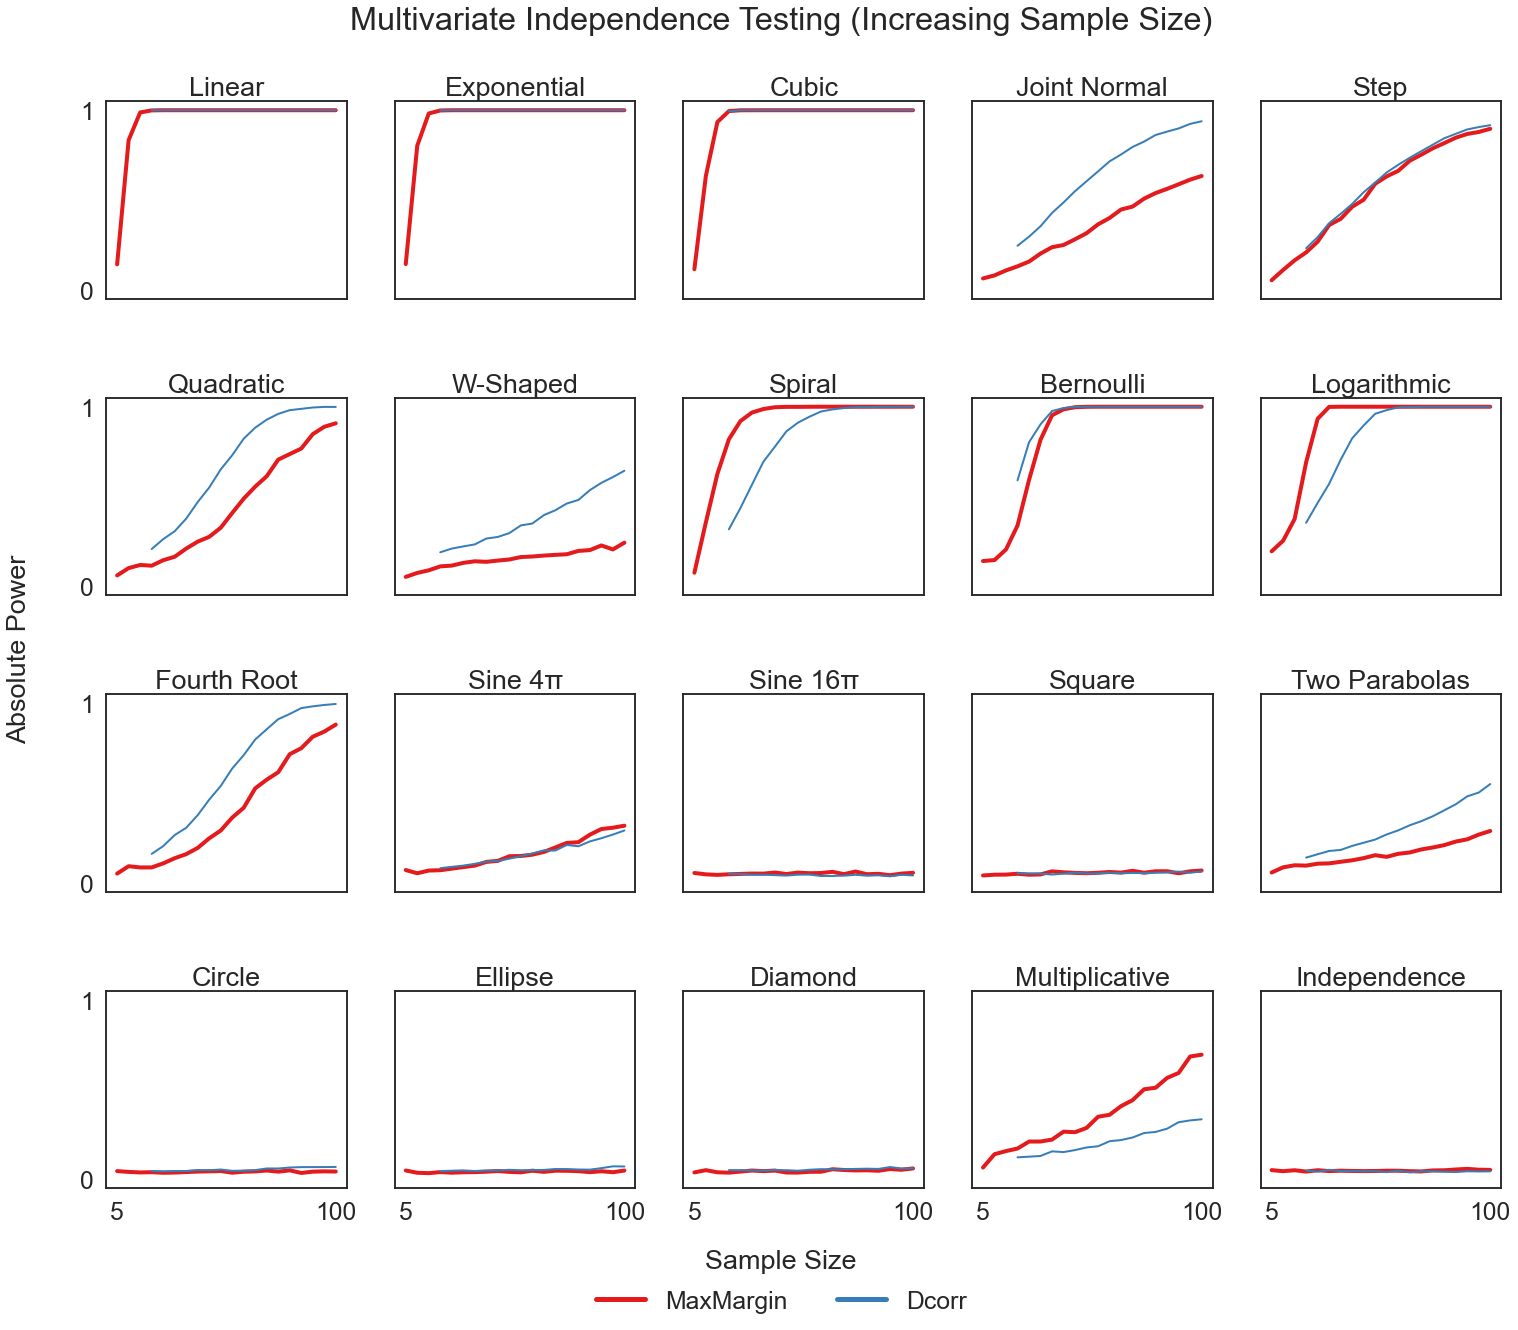

In [11]:
plot_power()